# Hotel Booking

In this assignment we are trying to predict whether a Hotel booking will be canceled

In [34]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Load Data

In [35]:
# Hotel bookings: predict is_canceled
file_path = 'hotel_bookings.csv'
hotel_bookings = pd.read_csv(file_path)

# show all rows / columns in notebook
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

Check how many examples and how many features are in the dataset

In [36]:
hotel_bookings.shape

(119390, 30)

We have 119,390 examples and 30 columns (29 features and one label). Let's look at the data

In [37]:
hotel_bookings.head(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
0,Resort Hotel,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,0
1,Resort Hotel,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,0
2,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,0
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,0
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,0


From Kaggle https://www.kaggle.com/jessemostipak/hotel-booking-demand data column descriptions:

'hotel': Hotel (H1 = Resort Hotel or H2 = City Hotel)

'lead_time': Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

'arrival_date_year': Year of arrival date

'arrival_date_month': Month of arrival date

'arrival_date_week_number': Week number of year for arrival date

'arrival_date_day_of_month': Day of arrival date

'stays_in_weekend_nights': Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

'stays_in_week_nights': Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

'adults': Number of adults

'children': Number of children

'babies': Number of babies

'meal': Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

'country': Country of origin. Categories are represented in the ISO 3155–3:2013 format

'market_segment': Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

'distribution_channel': Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

'is_repeated_guest': Value indicating if the booking name was from a repeated guest (1) or not (0)

'previous_cancellations': Number of previous bookings that were cancelled by the customer prior to the current booking

'previous_bookings_not_canceled': Number of previous bookings not cancelled by the customer prior to the current booking

'reserved_room_type': Code of room type reserved. Code is presented instead of designation for anonymity reasons.

'assigned_room_type': Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

'booking_changes': Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

'deposit_type': Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

'agent': ID of the travel agency that made the booking

'company': ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

'days_in_waiting_list': Number of days the booking was in the waiting list before it was confirmed to the customer

'customer_type': Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

'adr': Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

'required_car_parking_spaces': Number of car parking spaces required by the customer

'total_of_special_requests': Number of special requests made by the customer (e.g. twin bed or high floor)

'is_canceled': Value indicating if the booking was canceled (1) or not (0)

# Data Cleaning

Drop some features which aren't informative

In [38]:
hotel_bookings = hotel_bookings.drop(['country', 'agent', 'company', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type'], axis=1)

Label to numeric

In [39]:
hotel_bookings.hotel = (hotel_bookings.hotel=='Resort Hotel').astype('int')

Check for missing values

In [40]:
hotel_bookings.isna().mean()

hotel                             0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
booking_changes                   0.000000
days_in_waiting_list              0.000000
adr                               0.000000
required_car_parking_spaces       0.000000
total_of_special_requests         0.000000
is_canceled                       0.000000
dtype: float64

The children feature indeed has missing values here, Children is rarely missing at 0.0034%. Let's use the median to fill missing values

In [41]:
hotel_bookings.children = hotel_bookings.children.fillna(hotel_bookings.children.median())

In [42]:
hotel_bookings.isna().sum().sum()

0

No missing values. Categorical values to 1-hot

In [43]:
hotel_bookings = pd.get_dummies(hotel_bookings)
hotel_bookings.head(5)

,hotel,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
0,1,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


Check all values are indeed numeric

In [44]:
hotel_bookings.dtypes

hotel                               int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
is_canceled                         int64
arrival_date_month_April            uint8
arrival_date_month_August           uint8
arrival_date_month_December         uint8
arrival_date_month_February         uint8
arrival_date_month_January        

All features are numeric, perfect

# Finding interesting relationships

What is the label distribution

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

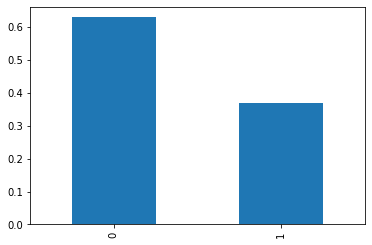

In [45]:
hotel_bookings.is_canceled.value_counts(normalize=True).plot(kind='bar');
hotel_bookings.is_canceled.value_counts(normalize=True)

around ~37% of the guests canceled their booking

What are the statistics of the data?

In [46]:
hotel_bookings.describe()

,hotel,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.335539,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363,0.370416,0.092880,0.116233,0.056789,0.067577,0.049661,0.106047,0.091624,0.082034,0.098760,0.056906,0.093475,0.088014
std,0.472181,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798,0.482918,0.290266,0.320505,0.231439,0.251019,0.217244,0.307900,0.288496,0.274417,0.298341,0.231664,0.291098,0.283317
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looking at the adults column, we can see that the average number of adults is 1.86, that the highest number of adults included in 1 booking is 55 and that 25% of the bookings are for 2 adults or less.

Looking at the is_canceled column, we can see again that only ~37% of the guests canceled their booking by looking at the mean row.

Looking at the hotel columns, we can see that 34% of bookings are for the Resort Hotel and the remaining 66% are for the City Hotel.

Let's see what correlations are in the data

In [47]:
hotel_bookings.corr()

,hotel,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
hotel,1.000000,-0.075381,-0.035267,-0.001270,0.001862,0.186596,0.234020,0.013183,0.044210,0.043434,0.050421,0.012292,0.004441,0.072820,-0.072432,-0.096719,0.218873,0.043390,-0.136531,-0.006832,0.013157,0.028593,0.027975,0.016624,0.018709,-0.038458,0.003215,-0.023625,0.012048,-0.011555,-0.026162
lead_time,-0.075381,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,0.000149,0.170084,-0.063077,-0.116451,-0.095712,0.293123,-0.027514,0.058121,-0.069918,-0.141459,-0.125571,0.104140,0.072029,-0.094810,0.042237,-0.063054,0.057043,0.094956
arrival_date_year,-0.035267,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.010341,-0.119822,0.029218,0.030872,-0.056497,0.197580,-0.013684,0.108531,0.016660,0.160090,-0.041982,-0.203670,0.137434,0.150020,0.021336,0.161462,0.148271,0.177269,-0.173943,-0.272664,-0.282448
arrival_date_week_number,-0.001270,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.030131,0.035501,-0.020904,0.005508,0.022933,0.075791,0.001920,0.026149,0.008148,-0.262668,0.166797,0.431626,-0.390879,-0.406244,0.046378,-0.060919,-0.342221,-0.167765,0.351933,0.358260,0.249544
arrival_date_day_of_month,0.001862,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.022728,0.030245,0.008683,0.003062,-0.006130,0.018618,-0.004435,0.007048,-0.001479,0.008309,0.012245,-0.024557,0.018281,0.008709,-0.038216,-0.012083,0.003610
stays_in_weekend_nights,0.186596,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,-0.087239,-0.012775,-0.042715,0.063281,-0.054151,0.049342,-0.018554,0.072671,-0.001791,0.006758,0.048250,-0.015371,-0.020077,-0.033927,0.066460,-0.002297,-0.020628,-0.019211,-0.035051,-0.010373,0.004494
stays_in_week_nights,0.234020,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,-0.002020,0.065237,-0.024859,0.068192,0.024765,-0.013773,0.063877,-0.018359,-0.045471,-0.036919,0.055093,0.025822,0.009454,-0.016199,-0.012392,-0.045361,0.003917
adults,0.013183,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.008283,0.230641,0.014785,0.122884,0.060017,0.010977,0.091751,-0.012771,-0.030384,-0.065403,0.077962,0.002296,-0.026695,-0.016956,-0.070182,-0.021780,0.008876
children,0.044210,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,0.048952,-0.033271,0.324853,0.056255,0.081736,0.005036,-0.000796,0.087758,0.002874,-0.004032,-0.015860,0.068712,-0.005785,-0.024313,-0.026763,-0.038718,-0.032948,-0.036617
babies,0.043434,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,-0.010621,0.029186,0.037383,0.097889,-0.032491,-0.010408,0.022985,0.008954,-0.001757,0.000345,0.005685,-0.004753,-0.006531,-0.006259,-0.003341,-0.007887,0.001054


And now plot correlations to is_canceled

<AxesSubplot:>

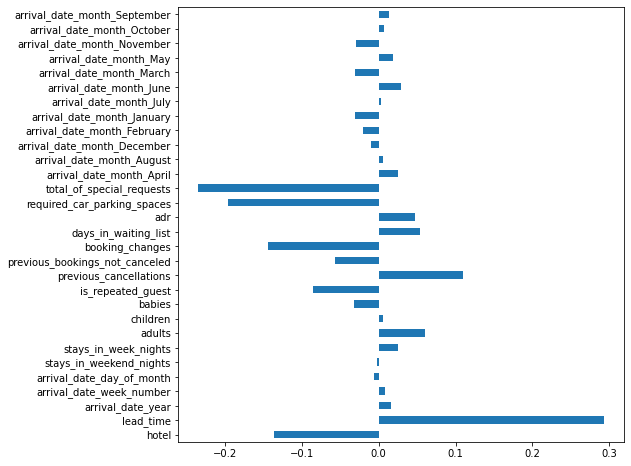

In [48]:
hotel_bookings.corr()['is_canceled'].drop('is_canceled').plot(kind='barh', figsize=(8, 8))

Some variables indeed have strong correlations, let's dive deep into total_of_special_requests

In [49]:
hotel_bookings.total_of_special_requests.head(10)

0    0
1    0
2    0
3    0
4    1
5    1
6    0
7    1
8    1
9    0
Name: total_of_special_requests, dtype: int64

What is the feature distribution?

In [50]:
total_of_special_requests_distribution = hotel_bookings.total_of_special_requests.value_counts(normalize=True).sort_index()
total_of_special_requests_distribution

0    0.588977
1    0.278298
2    0.108627
3    0.020915
4    0.002848
5    0.000335
Name: total_of_special_requests, dtype: float64

What are the cancelation rates for each feature value?

In [51]:
is_canceled_by_total_of_special_requests_rates = hotel_bookings.groupby('total_of_special_requests').is_canceled.mean()
is_canceled_by_total_of_special_requests_rates

total_of_special_requests
0    0.477204
1    0.220249
2    0.220989
3    0.178614
4    0.105882
5    0.050000
Name: is_canceled, dtype: float64

Let's plot it all into one graph

Text(0.5, 1.0, 'is_canceled rate by total_of_special_requests')

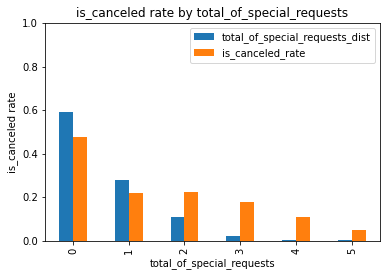

In [52]:
total_of_special_requests_stats = pd.DataFrame({'total_of_special_requests_dist':total_of_special_requests_distribution, 'is_canceled_rate':is_canceled_by_total_of_special_requests_rates})
total_of_special_requests_stats.index = total_of_special_requests_stats.index.map({0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5'})
total_of_special_requests_stats.plot(kind='bar')
plt.xlabel('total_of_special_requests')
plt.ylabel('is_canceled rate')
plt.ylim(0, 1)
plt.title('is_canceled rate by total_of_special_requests')

So most bookings do not include special requests, however if special requests are asked for the booking is unlikely to be canceled...

# Train and test split

Let's first convert all data to float because some modules warn against other types.

In [53]:
hotel_bookings = hotel_bookings.astype(float)

We have 119390 examples, let's use 2% for test and the 10% for train and split to inputs and labels. (I would love to use higher ratios and archieve higher accuracies but my laptop does not support)

In [54]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(hotel_bookings, train_size=0.1, test_size=0.02, random_state=0, shuffle=True)
x_train, y_train = train.drop('is_canceled', axis=1), train['is_canceled']
x_test, y_test = test.drop('is_canceled', axis=1), test['is_canceled']

In [55]:
train

,hotel,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
65474,0.0,112.0,2017.0,14.0,4.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14910,1.0,192.0,2017.0,33.0,17.0,2.0,8.0,3.0,0.0,0.0,1.0,1.0,3.0,2.0,0.0,211.2,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85919,0.0,5.0,2016.0,13.0,23.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
62183,0.0,46.0,2017.0,1.0,3.0,2.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66926,0.0,156.0,2017.0,17.0,26.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23352,1.0,92.0,2016.0,17.0,21.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116061,0.0,414.0,2017.0,28.0,13.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
41953,0.0,24.0,2015.0,35.0,28.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47171,0.0,40.0,2016.0,7.0,11.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11939, 30), (11939,), (2388, 30), (2388,))

# Evaluation + Benchmark

As this is a classification problem that is pretty balanced in its labels, we can use accuracy as our evaluation metric

In [57]:
from sklearn.metrics import accuracy_score

The benchmark would be the most common label in the train set

In [58]:
y_train.value_counts()

0.0    7425
1.0    4514
Name: is_canceled, dtype: int64

In this case it's 0 (not canceled), let's check its performance on both train and test

In [59]:
import numpy as np
def get_benchmark_predictions(x, benchmark_value):
    # returns a numpy array on the same length as x with all values equal to benchmark_value
    return np.ones(len(x))*benchmark_value

benchmark_value = 0

y_train_pred = get_benchmark_predictions(x_train, benchmark_value)
y_test_pred = get_benchmark_predictions(x_test, benchmark_value)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_acc, test_acc

(0.6219113828628864, 0.6323283082077052)

The performance on train and test is almost equal,  and , our best algorithm should beat the test performance. Let's establish a regression baseline:

In [60]:
from sklearn.metrics import mean_squared_error


def check_regressor(regressor, X_train, y_train, X_test, y_test):
    # Fit regression model
    regressor.fit(X_train, y_train)

    # Predict
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    y_pred_train = regressor.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    
    model_name = regressor.__class__.__name__
    print('{0} mean squared error is {1:.4f} (mse train {2:.4f})'.format(model_name, mse, mse_train))
    return mse, mse_train, model_name

models_errors = {}
models_errors_train = {}

class Benchmark:
    def fit(self, x, y):
        self.value = y.mean()
        return self
    
    def predict(self, x):
        return np.ones(len(x))*self.value
    
benchmark = Benchmark()
model_mse, model_mse_train, model_name = check_regressor(benchmark, x_train, y_train, x_test, y_test)
models_errors[model_name] = model_mse
models_errors_train[model_name] = model_mse_train

Benchmark mean squared error is 0.2326 (mse train 0.2351)


# Running KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(2, 5):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train, y_train)

    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print("k={}: {}, {}".format(k, train_acc, test_acc))

k=2: 0.8612949158220956, 0.7437185929648241
k=3: 0.8452131669319038, 0.7169179229480737
k=4: 0.80869419549376, 0.7269681742043551


Already better than the benchmark, and seems like the algorithm overfits a bit, also we know that KNN can highly suffer from features that are in different scales. So let's scale the x values first

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

for k in range(2, 5):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train_scaled, y_train)

    y_train_pred = clf.predict(x_train_scaled)
    y_test_pred = clf.predict(x_test_scaled)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print("k={}: {}, {}".format(k, train_acc, test_acc))

k=2: 0.8742775776865734, 0.7688442211055276
k=3: 0.8629700979981573, 0.742462311557789
k=4: 0.8327330597202446, 0.7571189279731994


Even better performance!

# Running Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

for depth in range(2, 5):
    tree = DecisionTreeClassifier(random_state=0, max_depth=depth)
    tree.fit(x_train, y_train)

    y_train_pred = tree.predict(x_train)
    y_test_pred = tree.predict(x_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print("max_depth={}: {}, {}".format(depth, train_acc, test_acc))

max_depth=2: 0.6720830890359326, 0.6846733668341709
max_depth=3: 0.7018175726610268, 0.7085427135678392
max_depth=4: 0.7382527849903677, 0.7495812395309883


# Running Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

for depth in range(2, 5):
    clf = RandomForestClassifier(n_estimators=100, max_depth=depth)
    clf.fit(x_train, y_train)

    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print("max_depth={}: {}, {}".format(depth, train_acc, test_acc))

max_depth=2: 0.6701566295334618, 0.6825795644891123
max_depth=3: 0.6766060809112991, 0.6888609715242882
max_depth=4: 0.7364100845966999, 0.7479061976549414


Nice Results!

# Random Forest Feature Importance

Let's look at the random forest feature importance

In [96]:
feature_importances = clf.feature_importances_
features = x_train.columns
stats = pd.DataFrame({'feature':features, 'importance':feature_importances})
stats.head(20)

,feature,importance
0,hotel,0.025179
1,lead_time,0.259953
2,arrival_date_year,0.018840
3,arrival_date_week_number,0.005665
4,arrival_date_day_of_month,0.002420
5,stays_in_weekend_nights,0.005539
6,stays_in_week_nights,0.019069
7,adults,0.007105
8,children,0.001450
9,babies,0.000358


Let's plot the top 10 most important features

Text(0.5, 1.0, 'Feature Importance of Random Forest')

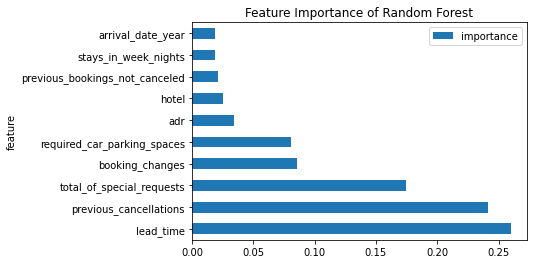

In [97]:
top_10 = stats.sort_values('importance', ascending=False).head(10)
top_10.plot(y='importance', x='feature', kind='barh')
plt.title('Feature Importance of Random Forest')

This is pretty aligned with what we saw in the correlations, so seems like the algorithm found the right patterns

# Running Ada Boost

In [100]:
from sklearn.ensemble import AdaBoostClassifier

ada_train_acc = []
ada_test_acc = []

for depth in range(2, 9):
    base_estimator = DecisionTreeClassifier(max_depth=depth)
    classifier = AdaBoostClassifier(random_state=0, n_estimators=100, base_estimator=base_estimator)
    classifier.fit(x_train, y_train)

    y_train_pred = classifier.predict(x_train)
    y_test_pred = classifier.predict(x_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    ada_train_acc.append(train_acc)
    ada_test_acc.append(test_acc)

    print("max_depth={}: {}, {}".format(depth, train_acc, test_acc))

max_depth=2: 0.7939525923444175, 0.7747068676716918
max_depth=3: 0.8387637155540665, 0.7755443886097152
max_depth=4: 0.8944635229081163, 0.7793132328308208
max_depth=5: 0.9550213585727448, 0.7738693467336684
max_depth=6: 0.9952257307982243, 0.7701005025125628
max_depth=7: 0.9953932490158305, 0.775963149078727
max_depth=8: 0.9953932490158305, 0.7855946398659966


Best results so far !

# Ada Boost Hyperparameters Inspection

Let's graph the accuracy in relation to the Hyperparameters for Ada Boost:

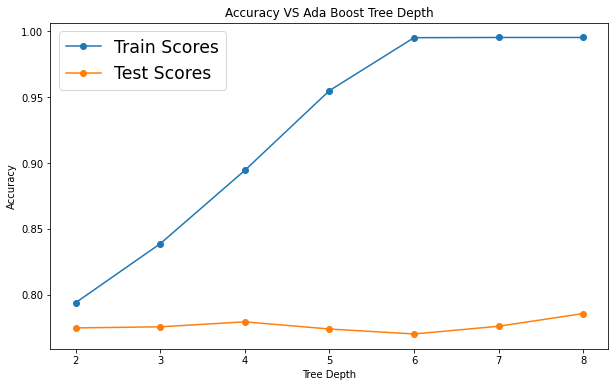

In [115]:
fig, ax = plt.subplots(1, figsize=(10,6))
ax.plot([i for i in range(2, len(ada_train_acc) + 2)], ada_train_acc, marker='o', label='Train Scores')
ax.plot([i for i in range(2, len(ada_test_acc) + 2)], ada_test_acc, marker='o', label='Test Scores')
ax.set_xlabel("Tree Depth")
ax.set_ylabel('Accuracy')
ax.title.set_text("Accuracy VS Ada Boost Tree Depth")
ax.legend(fontsize='xx-large')
plt.show()

The Accuracy seems to attain a local maximum at depth = 4

# Ada Boost Training Data Size

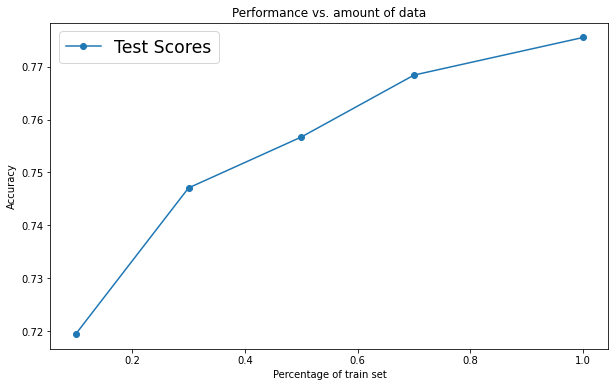

In [81]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

r_ada_test_acc = []

for ratio in [0.01, 0.03, 0.05, 0.07, 0.1]:
    r_train, r_test = train_test_split(hotel_bookings, train_size=ratio, test_size=0.02, random_state=0, shuffle=True)
    r_x_train, r_y_train = r_train.drop('is_canceled', axis=1), r_train['is_canceled']
    r_x_test, r_y_test = r_test.drop('is_canceled', axis=1), r_test['is_canceled']

    r_base_estimator = DecisionTreeClassifier(max_depth=3)
    r_classifier = AdaBoostClassifier(random_state=0, n_estimators=100, base_estimator=r_base_estimator)
    r_classifier.fit(r_x_train, r_y_train)

    r_y_train_pred = r_classifier.predict(r_x_train)
    r_y_test_pred = r_classifier.predict(r_x_test)

    r_test_acc = accuracy_score(r_y_test, r_y_test_pred)

    r_ada_test_acc.append(r_test_acc)

fig, ax = plt.subplots(1, figsize=(10,6))
ax.plot([0.1, 0.3, 0.5, 0.7, 1], r_ada_test_acc, marker='o', label='Test Scores')
ax.set_xlabel("Percentage of train set")
ax.set_ylabel('Accuracy')
ax.title.set_text("Performance vs. amount of data")
ax.legend(fontsize='xx-large')
plt.show()

I would recommend using more data as we have not yet reached a maximum even at 100%.

# Running Lasso Regression

In [76]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

for tradeoff_parameter in [0.01, 0.05, 0.1]:
    lasso = Lasso(alpha=tradeoff_parameter)
    lasso.fit(x_train_scaled, y_train)

    y_train_pred = lasso.predict(x_train_scaled)
    y_test_pred = lasso.predict(x_test_scaled)

    print('Lasso solution: b = {}, w={}'.format(lasso.intercept_, lasso.coef_))
    print('train mean_squared_error = {}'.format(mean_squared_error(y_train, y_train_pred)))
    print('test mean_squared_error = {}'.format(mean_squared_error(y_test, y_test_pred)))

Lasso solution: b = 0.37808861713711395, w=[-0.02478234  0.11655313  0.00300351 -0.          0.          0.
  0.00313862  0.00754237  0.00472145  0.         -0.00243063  0.03265982
 -0.         -0.05156072 -0.          0.02815618 -0.05927052 -0.07937449
  0.          0.          0.00204045  0.          0.         -0.
  0.         -0.          0.         -0.         -0.         -0.        ]
train mean_squared_error = 0.1918894873149492
test mean_squared_error = 0.18463946553231755
Lasso solution: b = 0.37808861713711367, w=[-0.          0.08799156  0.          0.          0.         -0.
  0.          0.          0.         -0.         -0.          0.
 -0.         -0.01614987  0.          0.         -0.03288239 -0.04265843
  0.          0.          0.          0.         -0.         -0.
  0.         -0.          0.         -0.         -0.         -0.        ]
train mean_squared_error = 0.20455287473981723
test mean_squared_error = 0.19979239784117983
Lasso solution: b = 0.378088617137113